# Linear Classification

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [3]:
# Get the dataset
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, transform=transforms.ToTensor()
)

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

## Visualize the data

In [4]:
# get a mini-batch of training samples
x, y = list(iter(train_loader))[0]

In [5]:
# check the size of mini-batch
x.shape, y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

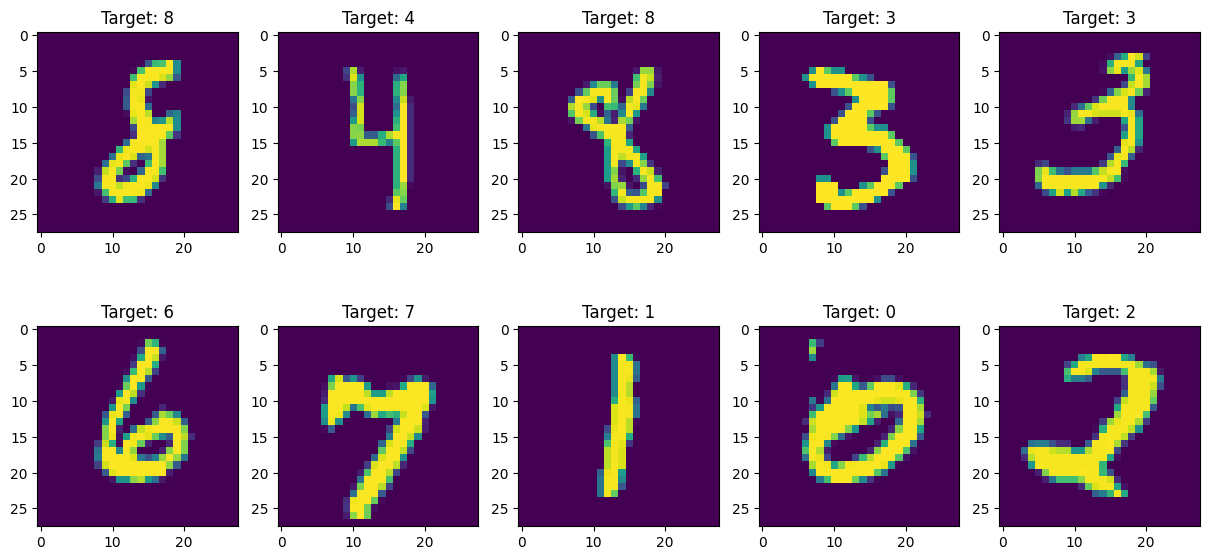

In [6]:
# plot a few samples
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x[i * 5 + j, 0, :, :])
        ax[i, j].set_title("Target: {}".format(y[i * 5 + j]))

## Build a logistic regression model

In [7]:
# Logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

In [8]:
model = LogisticRegression(input_size, num_classes)

# check the parameters of the linear model
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[-0.0056,  0.0341,  0.0141,  ..., -0.0229,  0.0228,  0.0100],
        [-0.0212, -0.0163, -0.0010,  ...,  0.0223, -0.0033, -0.0242],
        [ 0.0164, -0.0133, -0.0146,  ...,  0.0131,  0.0261,  0.0013],
        ...,
        [-0.0321, -0.0286, -0.0137,  ...,  0.0230, -0.0122,  0.0255],
        [ 0.0296, -0.0147, -0.0112,  ..., -0.0322, -0.0070,  0.0104],
        [-0.0182, -0.0172, -0.0276,  ...,  0.0238,  0.0205,  0.0308]],
       requires_grad=True)
linear.bias Parameter containing:
tensor([-0.0150,  0.0176, -0.0056,  0.0186, -0.0081,  0.0137,  0.0338, -0.0223,
        -0.0063,  0.0292], requires_grad=True)


In [9]:
# Loss Function
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()

# Optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28 * 28)

        # Forward pass
        outputs = model.forward(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, num_epochs, i + 1, total_step, loss.item()
                )
            )

Epoch [1/5], Step [100/600], Loss: 2.2418
Epoch [1/5], Step [200/600], Loss: 2.1476
Epoch [1/5], Step [300/600], Loss: 2.0189
Epoch [1/5], Step [400/600], Loss: 2.0013
Epoch [1/5], Step [500/600], Loss: 1.9093
Epoch [1/5], Step [600/600], Loss: 1.7930
Epoch [2/5], Step [100/600], Loss: 1.7315
Epoch [2/5], Step [200/600], Loss: 1.7038
Epoch [2/5], Step [300/600], Loss: 1.5785
Epoch [2/5], Step [400/600], Loss: 1.5763
Epoch [2/5], Step [500/600], Loss: 1.4816
Epoch [2/5], Step [600/600], Loss: 1.4984
Epoch [3/5], Step [100/600], Loss: 1.4441
Epoch [3/5], Step [200/600], Loss: 1.3667
Epoch [3/5], Step [300/600], Loss: 1.3631
Epoch [3/5], Step [400/600], Loss: 1.3760
Epoch [3/5], Step [500/600], Loss: 1.3450
Epoch [3/5], Step [600/600], Loss: 1.2710
Epoch [4/5], Step [100/600], Loss: 1.2446
Epoch [4/5], Step [200/600], Loss: 1.1388
Epoch [4/5], Step [300/600], Loss: 1.1154
Epoch [4/5], Step [400/600], Loss: 1.0585
Epoch [4/5], Step [500/600], Loss: 1.0937
Epoch [4/5], Step [600/600], Loss:

In [11]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print(
        "Accuracy of the model on the 10000 test images: {} %".format(
            100 * correct / total
        )
    )

# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")

Accuracy of the model on the 10000 test images: 82.62999725341797 %
